In [2]:
import librosa
import librosa.display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
dataset = pd.read_excel('Car-Engine-Sounds-Dataset-main\Car Sounds Sheet.xlsx')

In [4]:
dataset.head()

,Serial no.,Vehicle Name,Vehicle Model,Sound Tye
0,1,Suzuki Alto,2006,Normal
1,2,Suzuki Alto,2022,Normal
2,3,Suzuki Alto,2006,Normal
3,4,Suzuki Alto,2022,Normal
4,5,Audi A4 3.2L,2008,Normal


In [5]:
dataset.drop(labels=['Serial no.','Vehicle Name','Vehicle Model'], axis=1, inplace=True)

In [6]:
dataset.head()

,Sound Tye
0,Normal
1,Normal
2,Normal
3,Normal
4,Normal


In [7]:
dataset['Condition'] = dataset['Sound Tye'].replace({
    "Normal":"Not Faulty",
    "Abnormal":"Faulty"
})

In [8]:
dataset.drop(labels=['Sound Tye'], axis=1, inplace = True)

In [9]:
dataset.head()

,Condition
0,Not Faulty
1,Not Faulty
2,Not Faulty
3,Not Faulty
4,Not Faulty


In [10]:
normal_path = r"Car-Engine-Sounds-Dataset-main/Normal Car Sounds"
abnormal_path = r"Car-Engine-Sounds-Dataset-main/Abnormal Car Sounds"

In [11]:
data = []

for f in os.listdir(normal_path):
    if os.path.isfile(os.path.join(normal_path, f)):
        data.append({"File Name": f, "Condition": "Not Faulty"})

for f in os.listdir(abnormal_path):
    if os.path.isfile(os.path.join(abnormal_path, f)):
        data.append({"File Name": f, "Condition": "Faulty"})

dataset = pd.DataFrame(data)

In [12]:
dataset.head()

,File Name,Condition
0,Alto 06.wav,Not Faulty
1,Alto 2006.wav,Not Faulty
2,Alto 2022.wav,Not Faulty
3,Alto 22.wav,Not Faulty
4,Audi 2008 A4 3.2L.wav,Not Faulty


Text(0.5, 1.0, 'Not Faulty')

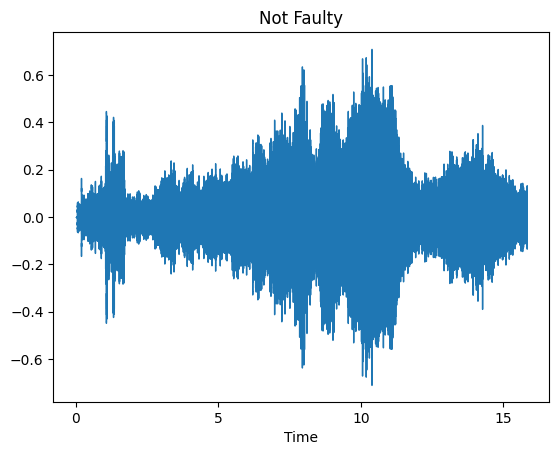

In [16]:
y, sr = librosa.load("Car-Engine-Sounds-Dataset-main/Normal Car Sounds/Suzukai mehran model 2004.wav")
librosa.display.waveshow(y, sr=sr)
plt.title("Not Faulty")

Text(0.5, 1.0, 'Faulty')

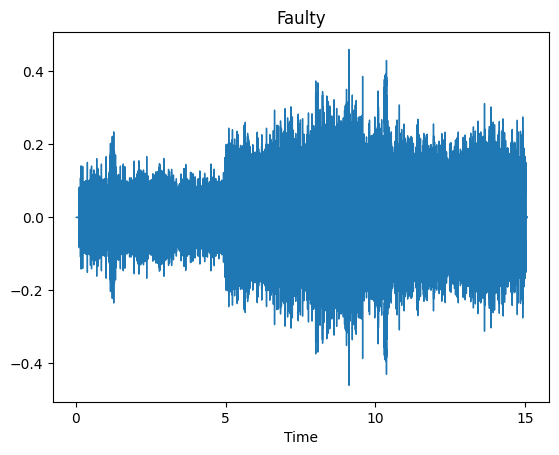

In [14]:
y, sr = librosa.load("Car-Engine-Sounds-Dataset-main/Abnormal Car Sounds/Suzuki Alto 2014 engine knocking.wav")
librosa.display.waveshow(y, sr=sr)
plt.title("Faulty")

In [14]:
dataset['Condition'].unique()

array(['Not Faulty', 'Faulty'], dtype=object)

In [15]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file, sr=None)
    mfccs_features = librosa.feature.mfcc(y=audio,sr = sample_rate, n_mfcc = 40)
    mfcc_scaled_features = np.mean(mfccs_features.T, axis=0)
    return mfcc_scaled_features

In [16]:
from tqdm import tqdm

extracted_features=[]

for f in tqdm(os.listdir(normal_path)):
    file_path = os.path.join(normal_path, f)
    if os.path.isfile(file_path):
        try:
            data = features_extractor(file_path)
            extracted_features.append([data, "Not Faulty"])
        except Exception as e:
            print(f"Error with {file_path}: {e}")

for f in tqdm(os.listdir(abnormal_path)):
    file_path = os.path.join(abnormal_path, f)
    if os.path.isfile(file_path):
        try:
            data = features_extractor(file_path)
            extracted_features.append([data, "Faulty"])
        except Exception as e:
            print(f"Error with {file_path}: {e}")

100%|██████████| 100/100 [00:04<00:00, 22.60it/s]


In [17]:
extracted_features_df = pd.DataFrame(extracted_features, columns=['feature', 'class'])

In [18]:
extracted_features_df.head()

,feature,class
0,"[-147.54445, 121.02616, -22.290186, 34.769367,...",Not Faulty
1,"[-130.84346, 122.51011, -18.599224, 35.985493,...",Not Faulty
2,"[-144.70401, 141.32466, -20.150059, 41.19933, ...",Not Faulty
3,"[-106.140465, 112.544464, -31.96563, 35.568295...",Not Faulty
4,"[-130.9683, 159.51688, -34.2182, 38.06153, -11...",Not Faulty


In [19]:
X = np.array(extracted_features_df['feature'].tolist())
y = np.array(extracted_features_df['class'].tolist())

In [20]:
X.shape

(216, 40)

In [21]:
print(y), print(y.shape)

['Not Faulty' 'Not Faulty' 'Not Faulty' 'Not Faulty' 'Not Faulty'
 'Not Faulty' 'Not Faulty' 'Not Faulty' 'Not Faulty' 'Not Faulty'
 'Not Faulty' 'Not Faulty' 'Not Faulty' 'Not Faulty' 'Not Faulty'
 'Not Faulty' 'Not Faulty' 'Not Faulty' 'Not Faulty' 'Not Faulty'
 'Not Faulty' 'Not Faulty' 'Not Faulty' 'Not Faulty' 'Not Faulty'
 'Not Faulty' 'Not Faulty' 'Not Faulty' 'Not Faulty' 'Not Faulty'
 'Not Faulty' 'Not Faulty' 'Not Faulty' 'Not Faulty' 'Not Faulty'
 'Not Faulty' 'Not Faulty' 'Not Faulty' 'Not Faulty' 'Not Faulty'
 'Not Faulty' 'Not Faulty' 'Not Faulty' 'Not Faulty' 'Not Faulty'
 'Not Faulty' 'Not Faulty' 'Not Faulty' 'Not Faulty' 'Not Faulty'
 'Not Faulty' 'Not Faulty' 'Not Faulty' 'Not Faulty' 'Not Faulty'
 'Not Faulty' 'Not Faulty' 'Not Faulty' 'Not Faulty' 'Not Faulty'
 'Not Faulty' 'Not Faulty' 'Not Faulty' 'Not Faulty' 'Not Faulty'
 'Not Faulty' 'Not Faulty' 'Not Faulty' 'Not Faulty' 'Not Faulty'
 'Not Faulty' 'Not Faulty' 'Not Faulty' 'Not Faulty' 'Not Faulty'
 'Not Faul

(None, None)

In [22]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [23]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
print(X_train.shape)
print(X_test.shape)

(172, 40)
(44, 40)


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [27]:
model = Sequential()

In [28]:
model.add(Dense(64, input_shape=(40,), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

d:\librosa\.env\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,737 (18.50 KB)

 Trainable params: 4,737 (18.50 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.fit(X_train, y_train, batch_size=16, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.4360 - loss: 12.4074 - val_accuracy: 0.6364 - val_loss: 1.8320
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5291 - loss: 9.5263 - val_accuracy: 0.8182 - val_loss: 1.0444
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6279 - loss: 4.9098 - val_accuracy: 0.8409 - val_loss: 1.2351
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6453 - loss: 5.1172 - val_accuracy: 0.8864 - val_loss: 0.8672
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6453 - loss: 3.8569 - val_accuracy: 0.8636 - val_loss: 0.7624
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6802 - loss: 3.9001 - val_accuracy: 0.8636 - val_loss: 0.7981
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6860 - loss: 3.5106 - val_accuracy: 0.9091 - val_loss: 1.0474
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7035 - loss: 3.2270 - val_accuracy: 0.9091 - val_lo

In [38]:
train_accuracy = model.evaluate(X_train, y_train, verbose=0)
print(train_accuracy[1])

0.9883720874786377


In [34]:
test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(test_accuracy[1])

0.9545454382896423


In [37]:
model.save("engine_fault_classifier.h5")

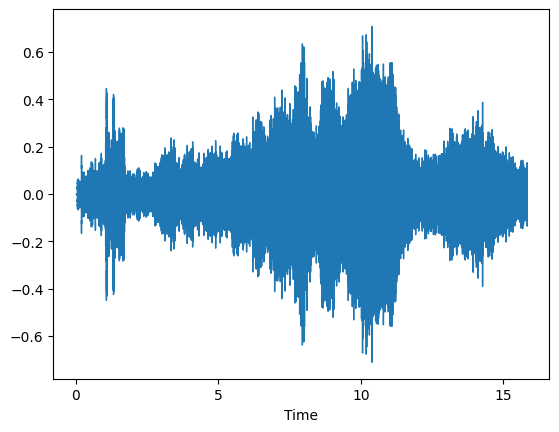

In [41]:
y, sr = librosa.load("Car-Engine-Sounds-Dataset-main/Normal Car Sounds/Suzukai mehran model 2004.wav")
librosa.display.waveshow(y, sr=sr)

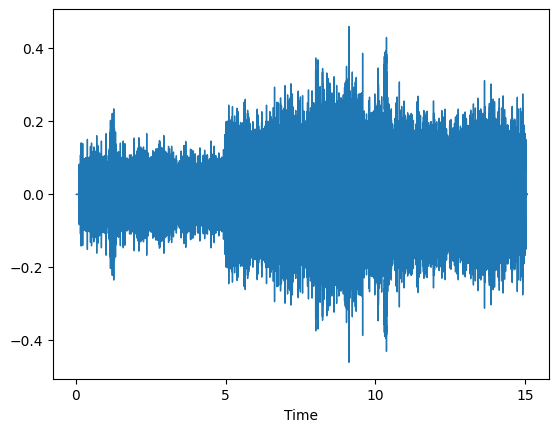

In [42]:
y, sr = librosa.load("Car-Engine-Sounds-Dataset-main/Abnormal Car Sounds/Suzuki Alto 2014 engine knocking.wav")
librosa.display.waveshow(y, sr=sr)

In [52]:
file_path = "Car-Engine-Sounds-Dataset-main/Abnormal Car Sounds/Ford focus 1.6 2013 engine knocking sound.wav"

features = features_extractor(file_path)
features = np.expand_dims(features, axis=0)

In [ ]:
prediction = model.predict(features) 
predicted_class = int(prediction[0] > 0.5) 

print("Probability:", prediction[0])
print("Predicted Class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Probability: [0.00012982]
Predicted Class: 0


C:\Users\dm560\AppData\Local\Temp\ipykernel_22564\3598206239.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class = int(prediction[0] > 0.5)


In [54]:
label_map = {0: "Faulty", 1: "Not Faulty"}
print("Predicted Label:", label_map[predicted_class])

Predicted Label: Faulty


In [ ]:
# import os
# from pydub import AudioSegment

# dataset_path = r"Car-Engine-Sounds-Dataset-main/Abnormal Car Sounds"

# for root, dirs, files in os.walk(dataset_path):
#     for file in files:
#         if file.lower().endswith(".mp4"):
#             mp4_path = os.path.join(root, file)
#             wav_path = os.path.splitext(mp4_path)[0] + ".wav"
            
#             try:
#                 print(f"Converting: {mp4_path}")
#                 audio = AudioSegment.from_file(mp4_path, format="mp4")
#                 audio.export(wav_path, format="wav")
                
#                 os.remove(mp4_path)
#                 print(f"Saved WAV & deleted: {mp4_path}")
#             except Exception as e:
#                 print(f"Error with {mp4_path}: {e}")
